In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

#definimos nuestras unidades
um = 1e-6
mm = 1e-3
nm= 1e-9

N = 2048
M = 2048
w_length = 650*nm
wvl = w_length
dx=dy=1*um

  ![image.png](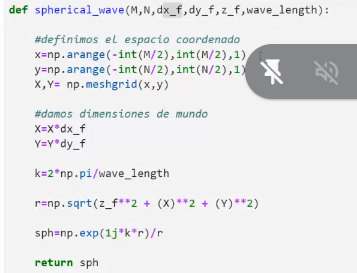
  )

In [ ]:
def spherical_wave(M,N,dx_f,dy_f,z_f,wave_length):
  #definimos el espacio coordenado
  x=np.arange(-int(M/2),int(M/2),1)
  y=np.arange(-int(N/2),int(N/2),1)
  X,Y =np.meshgrid(x,y)
  #damos dimensiones de mundo
  X = X*dx_f
  Y = Y*dy_f

  k=2*np.pi/wave_length
  r = np.sqrt(z_f**2 + (X)**2 +(Y)**2)

  sph= np.exp(1j*k*r)/r

  return sph

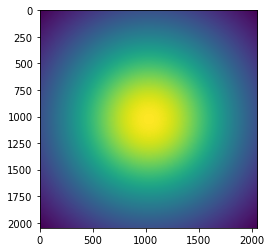

In [ ]:
z = 1*mm

SP1 = spherical_wave(M,N,dx,dy,z,w_length)

plt.figure()
plt.imshow(np.abs(SP1)**2)
plt.show()

In [ ]:
def T_AproxEA(T_f,dx_f,dy_f,z_f,wave_length):
  '''
  sea T_f: la transmirancia que le voya  ingresar, equivalente al U_0
  '''
  #tomamos el contenido freq de la imagen
  T_freq=np.fft.fftshift(np.fft.fft2(T_f))

  #definimos el espacio coordenado
  N_f, M_f = np.shape(T_f)
  
  x=np.arange(-int(M_f/2),int(M_f/2),1)
  y=np.arange(-int(N_f/2),int(N_f/2),1)
  X,Y= np.meshgrid(x,y)

  #damos dimensiones de mundo
 
  fx=X*(1/(M_f*dx_f))*wave_length
  fy=Y*(1/(N_f*dy_f))*wave_length

  k=2*np.pi/wave_length

  C1 = (1j*k*z_f)#/(1j*wave_Length*z_f)
  C2 = -1j*np.pi*wave_length*z_f

  
  mat = np.exp(C1*(1-(fx**2)-(fy**2))**1/2)
  freq_p = T_freq*mat
  return freq_p

In [ ]:
T = cv2.imread("gafas.png",0)
T = T/np.max(T)
print(np.shape(T))

(225, 225)


<function matplotlib.pyplot.show>

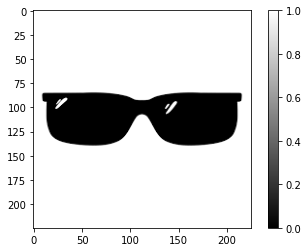

In [ ]:
plt.figure()
plt.imshow(T,cmap="gray")
plt.colorbar()
plt.show

In [ ]:
#frecuencias propagadas

**Espectro Angular**

El proceso tardó: 0.016048669815063477


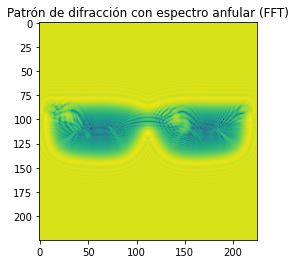

In [ ]:
#contar tiempo
start = time.time()

z2 = 0.1*mm
f_prop = T_AproxEA(T,dx,dy,z2,w_length)

dodoco_prop = np.fft.ifft2(f_prop)

#finaliza tiempo
end = time.time()
print('El proceso tardó:', end -start)


plt.figure()
plt.title("Patrón de difracción con espectro anfular (FFT)")
plt.imshow(np.log(np.abs(dodoco_prop)))
plt.show()

In [ ]:
T1 = cv2.imread("dodoco.jpg",0)
T1 = T1/np.max(T1)
print(np.shape(T1))

(450, 455)


<function matplotlib.pyplot.show>

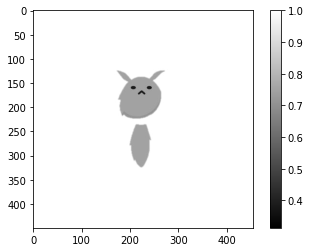

In [ ]:
plt.figure()
plt.imshow(T1,cmap="gray")
plt.colorbar()
plt.show

El proceso tardó: 0.036635398864746094


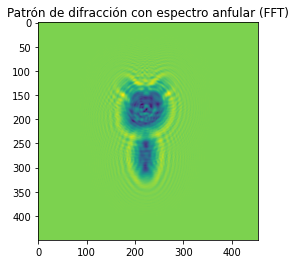

In [ ]:
#contar tiempo
start = time.time()

z2 = 0.1*mm
f_prop = T_AproxEA(T1,dx,dy,z2,w_length)

dodoco_prop = np.fft.ifft2(f_prop)

#finaliza tiempo
end = time.time()
print('El proceso tardó:', end -start)


plt.figure()
plt.title("Patrón de difracción con espectro anfular (FFT)")
plt.imshow(np.log(np.abs(dodoco_prop)))
plt.show()

In [ ]:
fondo=np.ones((720,720))

mask1=np.zeros(np.shape(fondo),dtype="uint8") #matriz de 1

coordx=int(np.shape(mask1)[1]/2)
coordy=int(np.shape(mask1)[0]/2) 
#tamaño del radio y cero
cv2.circle(mask1,(coordx,coordy),40,1,-1) #Circulo exterior 0


plt.figure()
plt.title("Mascara circular")
plt.imshow(mask1)
plt.colorbar()
plt.show()

TypeError: ignored

In [ ]:
#contar tiempo
start = time.time()
z = [1*mm,2*mm,3*mm,4*mm,5*mm,6*mm,7*mm,8*mm,9*mm,10*mm,11*mm]
for z2 in z:
  f_prop = T_AproxEA(mask1,dx,dy,z2,w_length)

  difr_prop_ob = np.fft.ifft2(f_prop)

  #finaliza tiempo
  end = time.time()
  print('El proceso tardó:', end -start)


  plt.figure()
  plt.title("Patrón de difracción con espectro anfular (FFT)")
  plt.imshow(np.abs(difr_prop_ob),cmap='gray')
  plt.show()

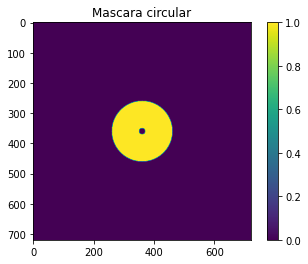

In [ ]:
#Diseñar una matriz que sera una onda monocromatica con fase 0
fondo=np.ones((720,720))

mask2=np.zeros(np.shape(fondo),dtype="uint8") #matriz de 1

coordx=int(np.shape(mask2)[1]/2)
coordy=int(np.shape(mask2)[0]/2) 
#tamaño del radio y cero
cv2.circle(mask2,(coordx,coordy),100,1,-1) #Circulo exterior 0
cv2.circle(mask2,((coordx),(coordy)),10,0,-1)

plt.figure()
plt.title("Mascara circular")
plt.imshow(mask2)
plt.colorbar()
plt.show()

El proceso tardó: 0.08722305297851562


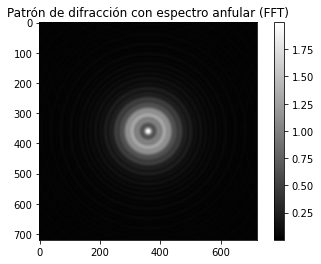

El proceso tardó: 0.0875856876373291


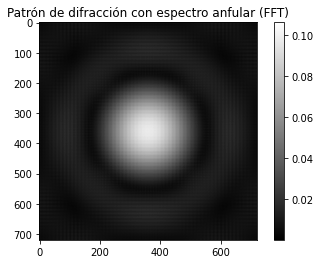

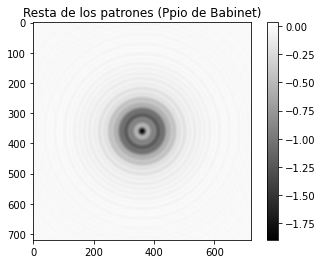

In [ ]:
#contar tiempo
start = time.time()

z2 = 5*mm
f_prop1 = T_AproxEA(mask2,dx,dy,z2,w_length)

difr_prop_ph = np.fft.ifft2(f_prop1)

#finaliza tiempo
end = time.time()
print('El proceso tardó:', end -start)


plt.figure()
plt.title("Patrón de difracción con espectro anfular (FFT)")
plt.imshow(np.abs(difr_prop_ph),cmap='gray')
plt.colorbar()
plt.show()

#contar tiempo
start = time.time()

f_prop = T_AproxEA(mask1,dx,dy,z2,w_length)

difr_prop_ob = np.fft.ifft2(f_prop)

#finaliza tiempo
end = time.time()
print('El proceso tardó:', end -start)


plt.figure()
plt.title("Patrón de difracción con espectro anfular (FFT)")
plt.imshow(np.abs(difr_prop_ob),cmap='gray')
plt.colorbar()
plt.show()



plt.figure()
plt.title("Resta de los patrones (Ppio de Babinet)")
plt.imshow(np.abs(difr_prop_ob)-np.abs(difr_prop_ph),cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
def T_AproxF(T_f,dx_f,dy_f,z_f,wave_length):
  '''
  sea T_f: la transmirancia que le voya  ingresar, equivalente al U_0
  '''
  #tomamos el contenido freq de la imagen
  T_freq=np.fft.fftshift(np.fft.fft2(T_f))

  #definimos el espacio coordenado
  N_f, M_f = np.shape(T_f)
  
  x=np.arange(-int(M_f/2),int(M_f/2)+1,1)
  y=np.arange(-int(N_f/2),int(N_f/2)+1,1)
  X,Y= np.meshgrid(x,y)

  #damos dimensiones de mundo
 
  fx=X*(1/(M_f*dx_f))*wave_length
  fy=Y*(1/(N_f*dy_f))*wave_length

  k=2*np.pi/wave_length

  C1 = ((1j*k)/(2*z_f))#/(1j*wave_Length*z_f)
  C2 = -1j*k*(1/z_f)*()

  
  mat = np.exp(C1*(x**2+y**2))*np.exp(C2*((fx**2)+(fy**2)))
  freq_p = T_freq*mat
  return freq_p

**Transformada de Fresnel**

In [ ]:
import numpy
def ft2(data, delta):
   
    DATA = numpy.fft.fftshift(
            numpy.fft.fft2(
                    numpy.fft.fftshift(data, axes=(-1,-2))
                    ), axes=(-1,-2)
            )

    return DATA

In [ ]:
def TFresnel(Uin, wvl, d1, z):
    """
    Propagación de Fresnel usando el método de Transformada de Fresnel
    Devuelve amplitud compleja tras la propagacion

    """
    N = Uin.shape[0]    #Se asume que es cuadrado
    k = 2*np.pi/wvl  #vector de onda optico

    #Coordenadas en el plano de entrada
    x1,y1 = np.meshgrid( np.arange(-N/2.,N/2.) * d1,
                            np.arange(-N/2.,N/2.) * d1)
    #Coordenadas del plano de observación
    d2 = wvl*z/(N*d1)
    x2,y2 = np.meshgrid( np.arange(-N/2.,N/2.) * d2,
                            np.arange(-N/2.,N/2.) * d2 )

    #Evaluación de la integral
    A = 1/(1j*wvl*z)
    B = np.exp( 1j * k/(2*z) * (x2**2 + y2**2))
    C = ft2(Uin *np.exp(1j * k/(2*z) * (x1**2+y1**2)), d1)

    Uout = A*B*C*np.exp(1j*k*z)

    return Uout

El proceso tardó: 0.1248922348022461


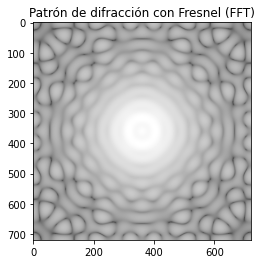

In [ ]:
#contar tiempo
start = time.time()

z2 = 0.1*mm
f_prop = TFresnel(mask1,w_length,1*um,z2)



#finaliza tiempo
end = time.time()
print('El proceso tardó:', end -start)


plt.figure()
plt.title("Patrón de difracción con Fresnel (FFT)")
plt.imshow(np.log(np.abs(f_prop)),cmap='gray')
plt.show()

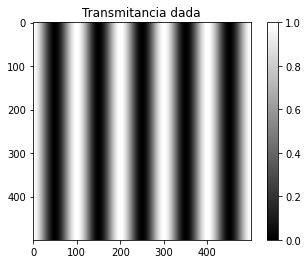

In [ ]:
### Máscara del punto 2a.


def transc(m, L,size):
    """
    Parametros:
        m
        L
        size (int)           : tamaño del array 2-D que contiene a la transmitancia

    Retorna:
        C (float64) : el arreglo de la transmitancia
    """
    # (1) Genera el arreglo de salida:
    C = numpy.zeros((size, size))

    coords = numpy.arange(0, size, 1)
   

    # (2) Genera las coordenadas 2-D de los centros de pixel:
    x, y = numpy.meshgrid(coords, coords)


    # (3) Calcula la salida:
   
    C[y,x] = 0.5*(1+m*np.cos(2*np.pi*x/L))

    return C


mask3=transc(1,100,500)

plt.figure()
plt.title("Transmitancia dada")
plt.imshow(mask3,cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
def dft(input_img):
    filas = input_img.shape[0]
    columnas = input_img.shape[1]
    output_img = np.zeros((filas,columnas),complex)
    for m in range(0,filas):
        for n in range(0,columnas):
            for x in range(0,filas):
                for y in range(0,columnas):
                    output_img[m][n] += input_img[x][y] * np.exp(-1j*2*np.pi*(m*x/filas+n*y/columnas))
    return output_img

In [ ]:
dft_ = dft(mask1)
out_dft = np.log(np.abs(dft_lena50))

plt.subplot(121),plt.imshow(out_dft,'gray'),plt.title('dft_output')
plt.show()


KeyboardInterrupt: ignored

In [ ]:
'''Debemos definir dimensiones de mundo para poder dimensionar de manera física las aberturas y obstáculos'''
M_mask = 720
N_mask = 720
#definimos el espacio coordenado
x=np.arange(-int(M_mask/2),int(M_mask/2),1)
y=np.arange(-int(N_mask/2),int(N_mask/2),1)
X,Y =np.meshgrid(x,y)
#damos dimensiones de mundo
X = X*dx
Y = Y*dy

#Presentamos las máscaras como areglos que permitan dimensiones reales iguales que las máscaras anteriores (en forma)

mask_circ = np.array(X**2+Y**2)